In [1]:
%matplotlib inline
from pjr import *
import string
from timeit import default_timer as timer

pjr.py complete


test latex syntax $a = b^2$

jname0 /global/project/projectdirs/acme/acme_diags/obs_for_acme_diags/MERRA2_ANN_1980_2016_climo.nc


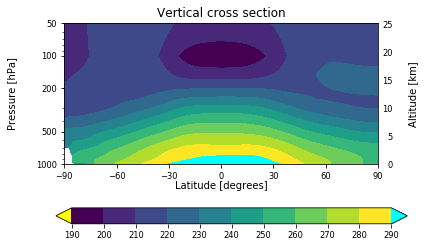

In [75]:
# original
levs = findNiceContours(np.array([40., 1000.]),20.,rmClev=0.)
jname0 = '/global/project/projectdirs/acme/acme_diags/obs_for_acme_diags/MERRA2_ANN_1980_2016_climo.nc'
g0 = cdms2.open(jname0)

print "jname0", jname0
g0 = cdms2.open(jname0);
varlist = g0.listvariables();
dims = g0.listdimension();
#print dims;
#print "\n".join(s for s in varlist if 'T' in s) # find vars that contain 'Z'
#print varlist;

T =  g0('ta',squeeze=1)            # extract fields, remove dimensions length one

niceeta = findNiceContours(eta*1010.0,20,rmClev=0.) # in hPa
nlevs = cdms2.createAxis(niceeta) # make a cdms vertical grid to remap to
TP0 = T.pressureRegrid(nlevs) 
TM = g2('T',squeeze=1) # get a model grid so we can regrid
TP0 = TP0.regrid(TM.getGrid())
# vertical regridding seems to lose the mask so add one back in
list = (TP0 > 0.9*TP0.missing_value) 
TP0.mask = list # make sure the missing vales are masked

# the following line does not work
#TP0 = T.pressureRegrid(nlevs,missing=TP0.missing_value)
#print "TP0.mask", TP0.mask
#print "TP0.info()", TP0.info()

TP0xav = cdutil.averager(TP0,axis="x")
levsp0 = TP0xav.getAxis(0)
lat0 = TP0xav.getAxis(1)
#print "lat0", len(lat0), lat0
#print "TP0xav range", TP0xav.min(), TP0xav.max()
plotZMf(TP0xav, lat0, levsp0)


jname2 /global/cscratch1/sd/leebrent/climos/output/20180316.DECKv1b_A1.ne30_oEC.edison/rgr/20180316.DECKv1b_A1.ne30_oEC.edison_ANN_197912_200411_climo.nc
reconstruct P time =  1.34120202065
interp time 24.5200200081
lat2    id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 257
   First:  -90.0
   Last:   90.0
   Other axis attributes:
      realtopology: linear
      long_name: Latitude
      standard_name: latitude
      valid_min: [-90.]
      valid_max: [90.]
      axis: Y
   Python id:  0x2ad44340d110

jname1 /global/cscratch1/sd/leebrent/climos/output/f.e11.FAMIP.f09_f09_same_setting_LENS/rgr/f.e11.FAMIP.f09_f09_same_setting_LENS_ANN_197912_200511_climo.nc
reconstruct P time =  0.205302000046
interp time 10.8488411903


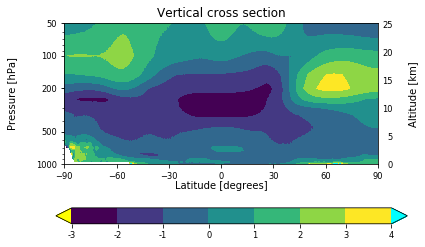

In [73]:

def getZAMP (fspec, vname, levs):
    """get zonal average field from model on pressure levels"""
    F =  fspec(vname,squeeze=1)            # extract fields, remove dimensions length one
    #lat1 = fspec['lat']
    #lon1 = fspec['lon']
    #lev1 = fspec['lev']

    #Fxav = cdutil.averager(F,axis="x")
    #print "Txav=", Txav.info()

    ps = fspec('PS',squeeze=1)
    hyam = fspec('hyam',squeeze=1)
    hybm = fspec('hybm',squeeze=1)

    start = timer()
    P = cdutil.reconstructPressureFromHybrid (ps,hyam,hybm,1.e5)
    P = P/100.; P.units = "hPa"
    stop1 = timer()
    print  "reconstruct P time = ", stop1-start
    FP1 = cdutil.logLinearInterpolation(F,P,levels=niceeta)
    stop2 = timer()
    print "interp time", stop2-stop1

    #print "FP1.info", FP1.info()
    FP1xav = cdutil.averager(FP1,axis="x")
    return FP1xav;




dir1 = "/global/cscratch1/sd/leebrent/climos/output/f.e11.FAMIP.f09_f09_same_setting_LENS/rgr/"
f1 = "f.e11.FAMIP.f09_f09_same_setting_LENS_ANN_197912_200511_climo.nc"
tit1 = "CAM5"
jname1 = dir1+f1

dir2 = '/global/cscratch1/sd/leebrent/climos/output/20180316.DECKv1b_A1.ne30_oEC.edison/rgr/'
f2 = '20180316.DECKv1b_A1.ne30_oEC.edison_ANN_197912_200411_climo.nc'
jname2 = dir2+f2
print "jname2", jname2
g2 = cdms2.open(jname2)
#print g2
TP2xav = getZAMP (g2, 'T', levs)
levsp2 = TP2xav.getAxis(0)
lat2 = TP2xav.getAxis(1)
print "lat2", lat2
#plotZMf(TP2xav, lat2, levsp2)

print "jname1", jname1
g1 = cdms2.open(jname1);
#varlist = g1.listvariables();
#dims = g1.listdimension();
#print dims;
#print "\n".join(s for s in varlist if 'Z' in s) # find vars that contain 'Z'
#print varlist;
#print "levs",levs
TP1xav = getZAMP (g1, 'T', levs)

levsp1 = TP1xav.getAxis(0)
lat1 = TP1xav.getAxis(1)
#print "lat1", lat1
#print "levsp1", levsp1
DTxav = TP2xav - TP0xav
plotZMf(DTxav, lat1, levsp1)



jname /global/cscratch1/sd/leebrent/climos/output/f.e11.FAMIP.f09_f09_same_setting_LENS/f.e11.FAMIP.f09_f09_same_setting_LENS_ANN_197912_200511_climo.nc
['chars', 'cosp_dbze', 'cosp_ht', 'cosp_htmisr', 'cosp_prs', 'cosp_scol', 'cosp_sr', 'cosp_sza', 'cosp_tau', 'cosp_tau_modis', 'ilev', 'lat', 'lev', 'lon', 'nbnd', 'slat', 'slon', 'time']
EVAPQZM
Z3
ZMDT
ZMDQ
ZMDLIQ
PRECCDZM
CMFMCDZM
FREQZM
ZMMTT
FRZRDT
ZMDLF
EVAPTZM
ZMDICE
PRECZ
TROP_Z
CFAD_DBZE94_CS
eta [0.00364347 0.00759482 0.01435663 0.02461222 0.0382683  0.05459548
 0.07201245 0.08782123 0.10331713 0.12154724 0.14299404 0.16822508
 0.19790809 0.23282862 0.27391082 0.3222419  0.3791009  0.44599257
 0.52468717 0.60977869 0.69138943 0.76340448 0.82085837 0.85953477
 0.88702025 0.91264455 0.9361984  0.95748548 0.97632541 0.9925561 ]
reconstruct P time =  0.114290952682
interp time 8.00827908516


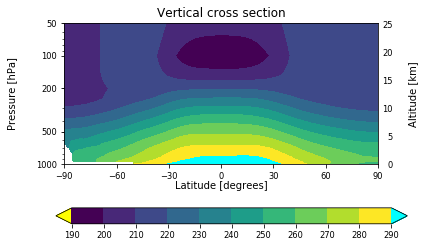

In [6]:
dir1 = "/global/cscratch1/sd/leebrent/climos/output/f.e11.FAMIP.f09_f09_same_setting_LENS/"
f1 = "f.e11.FAMIP.f09_f09_same_setting_LENS_ANN_197912_200511_climo.nc"
tit1 = "CAM5"
jname1 = dir1+f1

print "jname", jname
g1 = cdms2.open(jname);
varlist = g1.listvariables();
dims = g1.listdimension();
#print dims;
#print "\n".join(s for s in varlist if 'Z' in s) # find vars that contain 'Z'
#print varlist;

T =  g1('T',squeeze=1)            # extract fields, remove dimensions length one

lat1 = g1['lat']
lon1 = g1['lon']
lev1 = g1['lev']

Txav = cdutil.averager(T,axis="x")
#print "Txav=", Txav.info()

ps = g1('PS',squeeze=1)
hyam = g1('hyam',squeeze=1)
hybm = g1('hybm',squeeze=1)
eta1 = hyam+hybm
print "eta", eta1
niceeta = findNiceContours(eta*1010.0,20,rmClev=0.) # in hPa

start = timer()
P = cdutil.reconstructPressureFromHybrid (ps,hyam,hybm,1.e5)
P = P/100.; P.units = "hPa"
stop1 = timer()
print  "reconstruct P time = ", stop1-start
TP1 = cdutil.logLinearInterpolation(T,P,levels=niceeta)
stop2 = timer()
print "interp time", stop2-stop1

# print TP2.info()
TP1xav = cdutil.averager(TP1,axis="x")
levsp1 = TP1xav.getAxis(0)
plotZMf(TP1xav, lat1, levsp1)
